In [1]:
#Data Loading
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# loading the crimes data
data = pd.read_csv("Crimes_-_2001_to_present.csv")
# columns in the dataset
print(data.columns)
data.head(3)

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4930918,HM544061,08/16/2006 03:55:00 PM,006XX W SHERIDAN RD,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,True,False,...,46.0,6.0,05,1171089.0,1926189.0,2006,02/28/2018 03:56:25 PM,41.952937,-87.646460,"(41.952937476, -87.646459694)"
1,4930924,HM545898,08/17/2006 12:00:00 AM,053XX N CUMBERLAND AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,...,41.0,76.0,26,1119313.0,1934228.0,2006,02/28/2018 03:56:25 PM,41.975978,-87.836624,"(41.975978414, -87.83662354)"
2,4930927,HM545908,08/17/2006 03:00:00 PM,021XX N CANNON DR,0810,THEFT,OVER $500,OTHER,False,False,...,43.0,7.0,06,1175179.0,1914632.0,2006,02/28/2018 03:56:25 PM,41.921134,-87.631772,"(41.92113376, -87.631772431)"


In [2]:
data['Year'].value_counts()

2002    486754
2001    485751
2003    475940
2004    469383
2005    453714
2006    448106
2007    437009
2008    427056
2009    392678
2010    370307
2011    351773
2012    335958
2013    307089
2014    275265
2016    268951
2017    268002
2018    265823
2015    264042
2019     32170
Name: Year, dtype: int64

In [3]:
#Filtering years from 2015 to 2018
years = [2015,2016,2017,2018]
crimes = data[data.Year.isin(years)]

In [4]:
crimes['Community Area']=crimes['Community Area'].astype(str)

C:\Users\renug\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5]:
crimes.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area           object
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [6]:
crimes.head(3)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1115329,11207956,JB120346,01/18/2018 09:35:00 AM,076XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,True,False,...,17.0,69.0,08B,1175515.0,1854490.0,2018,05/04/2018 03:51:04 PM,41.756092,-87.632341,"(41.756091788, -87.632341337)"
1115331,11072665,JA412761,08/24/2017 03:42:00 PM,037XX S INDIANA AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,DAY CARE CENTER,True,False,...,3.0,35.0,20,1178221.0,1880010.0,2017,11/07/2018 04:13:47 PM,41.826060,-87.621650,"(41.826060201, -87.621650289)"
1115337,11236141,JB159579,02/21/2018 12:15:00 AM,044XX S DR MARTIN LUTHER KING JR DR,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,3.0,38.0,14,1179600.0,1875687.0,2018,05/04/2018 03:51:04 PM,41.814166,-87.616723,"(41.814166087, -87.616723368)"


In [7]:
crimes.to_csv('final_data.csv')

In [8]:
#Crimes count basing on Crime type
crime_count = pd.DataFrame(crimes.groupby('Primary Type').size().sort_values(ascending=False).rename('Count of Crimes').reset_index())

#crime type having count>=10000
prim_type = pd.DataFrame(crime_count.values[crime_count['Count of Crimes'] >= 10000]) 
prim_type.columns = ['Primary_Type','Count of Crimes']
prim_type

,Primary_Type,Count of Crimes
0,THEFT,248299
1,BATTERY,198207
2,CRIMINAL DAMAGE,116532
3,ASSAULT,75461
4,DECEPTIVE PRACTICE,72329
5,OTHER OFFENSE,69155
6,NARCOTICS,61718
7,BURGLARY,52192
8,ROBBERY,43162
9,MOTOR VEHICLE THEFT,42766


In [9]:
#filtering crime types having count>=10000 
primary_type = prim_type.Primary_Type
crimes=crimes[crimes['Primary Type'].isin(primary_type)]

In [10]:
#dataset after filtering done basing on primary type and years
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1115329,11207956,JB120346,01/18/2018 09:35:00 AM,076XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,True,False,...,17.0,69.0,08B,1175515.0,1854490.0,2018,05/04/2018 03:51:04 PM,41.756092,-87.632341,"(41.756091788, -87.632341337)"
1115337,11236141,JB159579,02/21/2018 12:15:00 AM,044XX S DR MARTIN LUTHER KING JR DR,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,3.0,38.0,14,1179600.0,1875687.0,2018,05/04/2018 03:51:04 PM,41.814166,-87.616723,"(41.814166087, -87.616723368)"
1115338,11236178,JB159602,02/21/2018 12:40:00 AM,037XX W ADDISON ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,30.0,16.0,04B,1150919.0,1923677.0,2018,05/04/2018 03:51:04 PM,41.946464,-87.720672,"(41.946464013, -87.720672053)"
1115339,11236182,JB159629,02/21/2018 02:40:00 AM,061XX S INDIANA AVE,0326,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,STREET,False,False,...,20.0,40.0,03,1178648.0,1864489.0,2018,05/04/2018 03:51:04 PM,41.783459,-87.620556,"(41.783459478, -87.620555964)"
1115341,11236225,JB159680,02/21/2018 06:00:00 AM,012XX W MADISON ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,27.0,28.0,07,1168157.0,1900169.0,2018,05/04/2018 03:51:04 PM,41.881601,-87.657991,"(41.881601096, -87.657991057)"


In [11]:
#crimes data shape
crimes.shape

(1023189, 22)

In [12]:
#columns data
crimes.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [13]:
#null values count
crimes.isna().sum()

ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     3250
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                        6
Community Area              0
FBI Code                    0
X Coordinate            11936
Y Coordinate            11936
Year                        0
Updated On                  0
Latitude                11936
Longitude               11936
Location                11936
dtype: int64

In [14]:
#dropping null values
crimes = crimes.dropna()
#checkign after dropping null values
crimes.isna().sum()
#shape
crimes.shape

(1008886, 22)

# Creating map based on community area column


In [15]:
#Creating map based on community area column
import folium
chicago_map = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11,
                        tiles="CartoDB dark_matter")
community_area = crimes.groupby('Community Area').first()
map_loc = community_area.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]

In [16]:
#Interactive Map based on arrest and community area
for i in range(len(map_loc)):
    lat = map_loc.iloc[i][0]
    long = map_loc.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(map_loc.index[i],
                               map_loc.iloc[i][-1],
                               map_loc.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(chicago_map)

In [17]:
#Interactive map
chicago_map

# Creating map based on crime count in each (latitude,longitude) combination


In [18]:
#Unique locations count
unique_locations = crimes['Location'].value_counts()

In [19]:
#dataframe showing crime count for each (latitude,longitude combination)
new_df = pd.DataFrame({"lat_long" : unique_locations.index, "count":unique_locations})
new_df.index = range(len(unique_locations))
new_df.head()

,lat_long,count
0,"(41.883500187, -87.627876698)",1990
1,"(41.754592961, -87.741528537)",1163
2,"(41.897895128, -87.624096605)",1113
3,"(41.976290414, -87.905227221)",955
4,"(41.742710224, -87.634088181)",859


In [20]:
def location(lat_long):
    preProcess = lat_long[1:-1].split(',')
    lat =  float(preProcess[0])
    long = float(preProcess[1])
    return (lat, long)
new_df['Location'] = new_df['lat_long'].apply(location)
new_df  = new_df.drop(columns=['lat_long'], axis = 1)

In [21]:
crime_map = folium.Map(location=[41.895140898, -87.624255632],zoom_start=13,tiles="CartoDB dark_matter")
for i in range(500):
    lat = new_df['Location'].iloc[i][0]
    long = new_df['Location'].iloc[i][1]
    radius = new_df['count'].iloc[i] / 45
    
    if new_df['count'].iloc[i] > 1000:
        color = "green"
    else:
        color = "red"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,long,new_df['count'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(crime_map)

In [22]:
crime_map

In [23]:
#Deleting unnecessary columns
columns = ['Case Number','Block','IUCR','Ward','Community Area','FBI Code','Location','Beat',
          'X Coordinate','Y Coordinate']
crimes.drop(columns, inplace=True, axis=1)

In [24]:
#Final dataset
crimes.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Updated On,Latitude,Longitude
1115329,11207956,01/18/2018 09:35:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,True,False,6.0,2018,05/04/2018 03:51:04 PM,41.756092,-87.632341
1115337,11236141,02/21/2018 12:15:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,2.0,2018,05/04/2018 03:51:04 PM,41.814166,-87.616723
1115338,11236178,02/21/2018 12:40:00 AM,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,17.0,2018,05/04/2018 03:51:04 PM,41.946464,-87.720672
1115339,11236182,02/21/2018 02:40:00 AM,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,STREET,False,False,3.0,2018,05/04/2018 03:51:04 PM,41.783459,-87.620556
1115341,11236225,02/21/2018 06:00:00 AM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,12.0,2018,05/04/2018 03:51:04 PM,41.881601,-87.657991


In [25]:
#Date column
crimes['Date'] = pd.to_datetime(crimes['Date'], format = '%m/%d/%Y %I:%M:%S %p')

In [26]:
#Rerteiving Month from Date column
import calendar
crimes['Month'] = (crimes['Date'].dt.month).apply(lambda x:calendar.month_abbr[x])
crimes.head(3)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Updated On,Latitude,Longitude,Month
1115329,11207956,2018-01-18 09:35:00,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,True,False,6.0,2018,05/04/2018 03:51:04 PM,41.756092,-87.632341,Jan
1115337,11236141,2018-02-21 00:15:00,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,2.0,2018,05/04/2018 03:51:04 PM,41.814166,-87.616723,Feb
1115338,11236178,2018-02-21 00:40:00,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,17.0,2018,05/04/2018 03:51:04 PM,41.946464,-87.720672,Feb


In [27]:
#Retrieving Weekdays from Date column
crimes['Weekday'] = crimes['Date'].dt.weekday_name
crimes['Weekday'] = pd.Categorical(crimes['Weekday'],
            categories = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],ordered = True)
crimes.head(2)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Updated On,Latitude,Longitude,Month,Weekday
1115329,11207956,2018-01-18 09:35:00,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,True,False,6.0,2018,05/04/2018 03:51:04 PM,41.756092,-87.632341,Jan,Thursday
1115337,11236141,2018-02-21 00:15:00,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,2.0,2018,05/04/2018 03:51:04 PM,41.814166,-87.616723,Feb,Wednesday


In [28]:
crimes['Hour of Day'] = crimes['Date'].dt.hour
crimes['Hour of Day'] = pd.Categorical(crimes['Hour of Day'],
            categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],ordered = True)
crimes.head(2)
#hour = top_crimes.pivot_table(values ='ID', index = 'Primary Type', columns = top_crimes['Date'].dt.hour, aggfunc = np.size)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Updated On,Latitude,Longitude,Month,Weekday,Hour of Day
1115329,11207956,2018-01-18 09:35:00,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,True,False,6.0,2018,05/04/2018 03:51:04 PM,41.756092,-87.632341,Jan,Thursday,9
1115337,11236141,2018-02-21 00:15:00,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,2.0,2018,05/04/2018 03:51:04 PM,41.814166,-87.616723,Feb,Wednesday,0


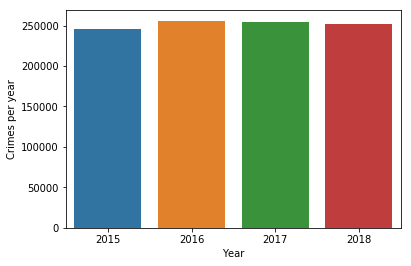

In [29]:
#Crimes per year plot
import seaborn as sns
sns.countplot(x='Year',data=crimes)
plt.ylabel("Crimes per year")
plt.show()

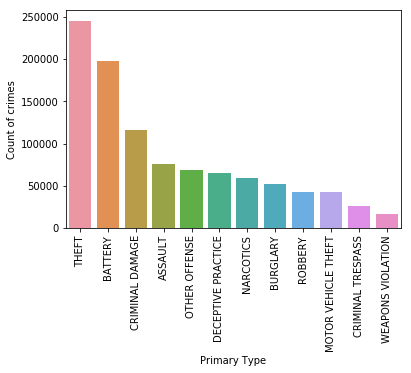

In [30]:
#Crimes according to Primary type of crime
sns.countplot(x='Primary Type',data = crimes, order = crimes['Primary Type'].value_counts().index)
plt.xticks(rotation = 'vertical')
plt.ylabel('Count of crimes')
plt.show()

In [31]:
#Condiering only Crime types
desc = crimes[['Primary Type']]
desc.head()

,Primary Type
1115329,BATTERY
1115337,CRIMINAL DAMAGE
1115338,BATTERY
1115339,ROBBERY
1115341,MOTOR VEHICLE THEFT


In [32]:
#Crimes count basing on Crime type
crime_count = pd.DataFrame(desc.groupby('Primary Type').size().sort_values(ascending=False).rename('Count of Crimes').reset_index())

In [33]:
#Top 10 crime locations with count
top_10_crimes = crimes.groupby('Location Description')['ID'].count().sort_values(ascending = False)
top_10_crimes = top_10_crimes[:10]
top_10_crimes

Location Description
STREET                            229950
RESIDENCE                         165065
APARTMENT                         129922
SIDEWALK                           87742
OTHER                              41796
PARKING LOT/GARAGE(NON.RESID.)     30715
SMALL RETAIL STORE                 25176
RESTAURANT                         24324
RESIDENTIAL YARD (FRONT/BACK)      20916
ALLEY                              19609
Name: ID, dtype: int64

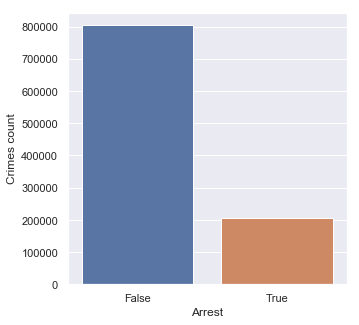

In [34]:
#Arrested VS Not Arrested
sns.set(rc = {'figure.figsize':(5,5)})
sns.countplot(x='Arrest',data = crimes)
plt.ylabel('Crimes count')
plt.show()

Number of arrests made were less

# Crime-wise arrests

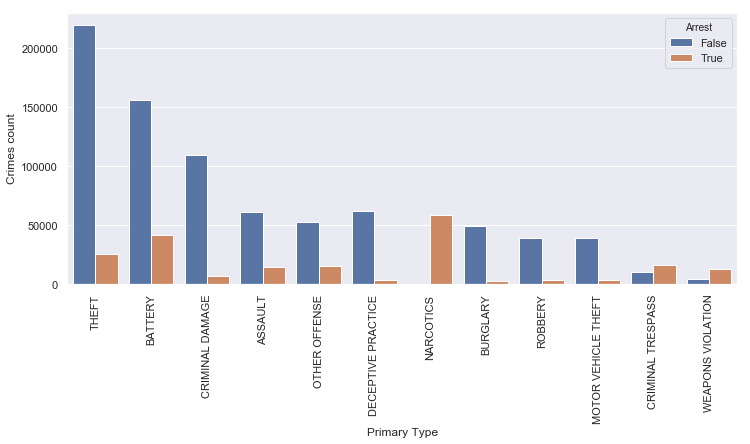

In [35]:
#Arrest count basing on Crime type
sns.set(rc = {'figure.figsize':(12,5)})
sns.countplot(x = 'Primary Type', hue = 'Arrest', data = crimes, order = crimes['Primary Type'].value_counts().index)
plt.xticks(rotation = 'vertical')
plt.ylabel('Crimes count')
plt.show()

# Crimes Vs Arrests monthly wise

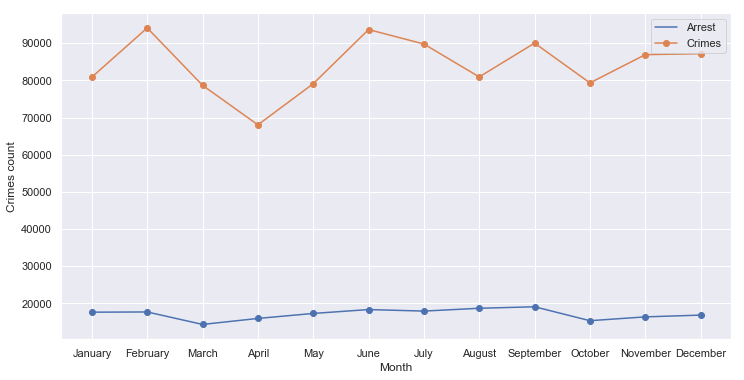

In [36]:
#Crime VS Arrest
sns.set(rc = {'figure.figsize':(12,6)})
arrest = crimes[crimes['Arrest'] == True]
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
arrest.groupby('Month')['ID'].count().plot(legend = True, label = 'Arrest', marker = 'o')
crimes.groupby('Month')['ID'].count().plot(legend = True, label = 'Crimes', marker = 'o')
plt.ylabel('Crimes count')
plt.xticks(np.arange(12),months)
plt.show()

Number of arrests were less than the crimes count

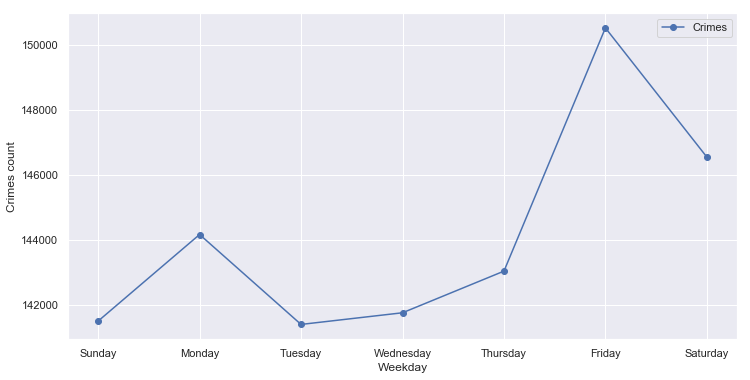

In [37]:
#Crimes weekly wise
sns.set(rc = {'figure.figsize':(12,6)})
weekday = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
crimes.groupby('Weekday')['ID'].count().plot(legend = True, label = 'Crimes', marker = 'o')
plt.ylabel('Crimes count')
plt.xticks(np.arange(7),weekday)
plt.show()

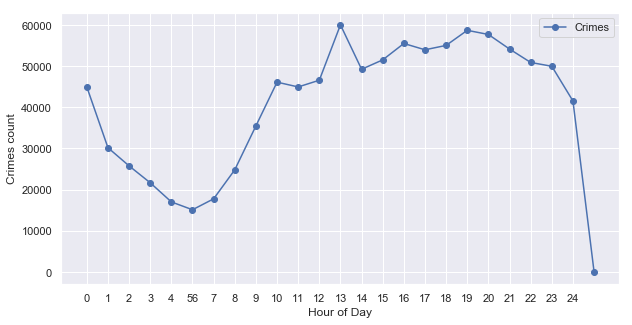

In [38]:
#Crimes hourly wise
sns.set(rc = {'figure.figsize':(10,5)})
Hour_of_day = [0,1,2,3,4,56,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
crimes.groupby('Hour of Day')['ID'].count().plot(legend = True, label = 'Crimes', marker = 'o')
plt.ylabel('Crimes count')
plt.xticks(np.arange(24),Hour_of_day)
plt.show()

In [39]:
crimes['District'].unique()

array([ 6.,  2., 17.,  3., 12.,  8., 22., 10., 18.,  1., 19.,  4.,  7.,
       25., 11., 14.,  9.,  5., 20., 24., 15., 16., 31.])

# Domestic violence monthly wise

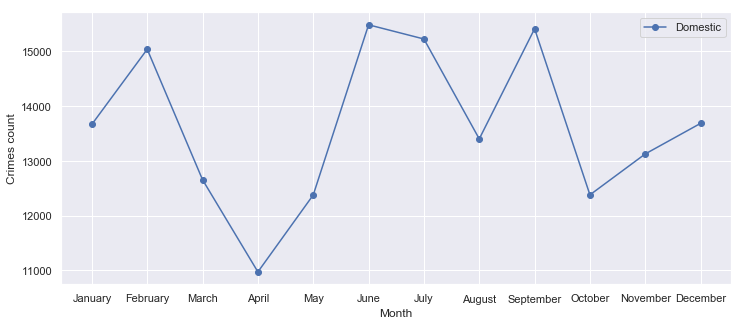

In [40]:
#Domestic violence monthly wise
sns.set(rc = {'figure.figsize':(12,5)})
domestic = crimes[crimes['Domestic'] == True]
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
domestic.groupby('Month')['ID'].count().plot(legend = True, label = 'Domestic', marker = 'o')
plt.ylabel('Crimes count')
plt.xticks(np.arange(12),months)
plt.show()

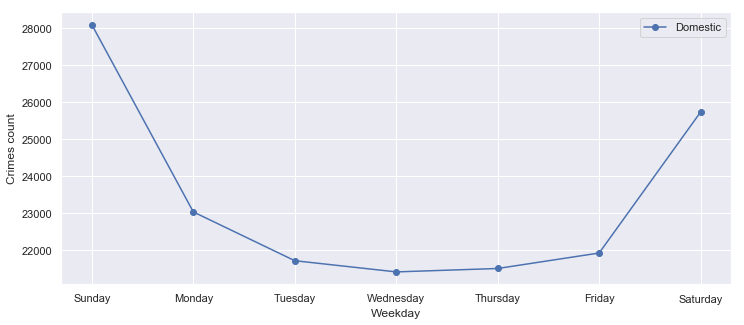

In [41]:
#Domestic violence monthly wise
sns.set(rc = {'figure.figsize':(12,5)})
domestic = crimes[crimes['Domestic'] == True]
weekday = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
domestic.groupby('Weekday')['ID'].count().plot(legend = True, label = 'Domestic', marker = 'o')
plt.ylabel('Crimes count')
plt.xticks(np.arange(7),weekday)
plt.show()

# Considering top 5 crimes

In [42]:
#cosidering only top 5 crimes
top_crimes = crimes[(crimes['Primary Type'] == 'THEFT') | (crimes['Primary Type'] == 'BATTERY') | 
                   (crimes['Primary Type'] == 'CRIMINAL DAMAGE') | (crimes['Primary Type'] == 'NARCOTICS') | 
                   (crimes['Primary Type'] == 'ASSAULT')]

top_crimes.head(3)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Updated On,Latitude,Longitude,Month,Weekday,Hour of Day
1115329,11207956,2018-01-18 09:35:00,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,True,False,6.0,2018,05/04/2018 03:51:04 PM,41.756092,-87.632341,Jan,Thursday,9
1115337,11236141,2018-02-21 00:15:00,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,2.0,2018,05/04/2018 03:51:04 PM,41.814166,-87.616723,Feb,Wednesday,0
1115338,11236178,2018-02-21 00:40:00,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,17.0,2018,05/04/2018 03:51:04 PM,41.946464,-87.720672,Feb,Wednesday,0


# Which hour of day has more crime count(top 5 crimes)?

In [43]:
hour = top_crimes.pivot_table(values ='ID', index = 'Primary Type', columns = top_crimes['Date'].dt.hour, aggfunc = np.size)

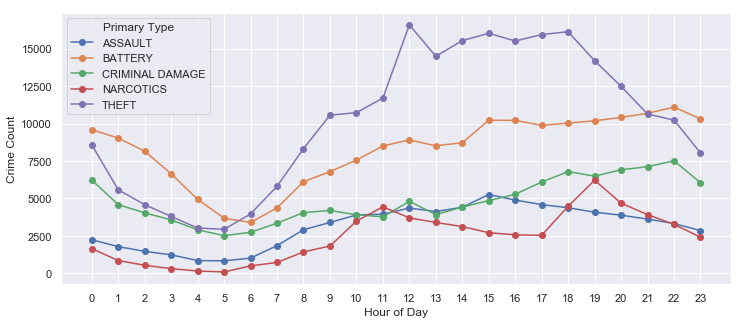

In [44]:
top_crimes.groupby([top_crimes['Date'].dt.hour,'Primary Type',])['ID'].count().unstack().plot(marker = 'o')
plt.ylabel('Crime Count')
plt.xlabel('Hour of Day')
plt.xticks(np.arange(24))
plt.show()

Top 5 Crimes and their count high hour: 
Assault - 12 , Battery - 4 , Criminal Damage - 0 , Narcotics - 7, Theft - 3

# Weekly trend of  top 5 crimes

In [45]:
weekday = top_crimes.pivot_table(values = 'ID', index = 'Primary Type', columns = 'Weekday', aggfunc = np.size)
weekday


Weekday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
Primary Type,,,,,,,
ASSAULT,10384,10817,11086,11091,11028,10752,10149
BATTERY,33946,27168,25945,25912,26026,27329,31606
CRIMINAL DAMAGE,17975,16263,15293,15523,15815,16819,18488
NARCOTICS,7494,8086,8375,8568,8748,9801,8064
THEFT,31833,35133,34834,35071,35654,37456,35367


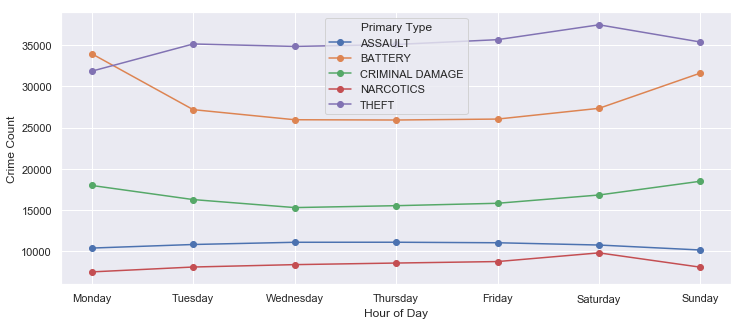

In [46]:
top_crimes.groupby(['Weekday','Primary Type',])['ID'].count().unstack().plot(marker = 'o')
weekday = ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.ylabel('Crime Count')
plt.xlabel('Hour of Day')
plt.xticks(np.arange(7),weekday)
plt.show()

Assault - Friday , Battery - Sunday , Criminal Damage - Saturday , Narcotics - Friday, Theft - Wednesday

# Locations where top 5 crimes occured


In [47]:
#consider only top 10 locations and others as OTHER
locations = list(top_crimes['Location Description'].value_counts()[:10].index)
top_crimes['Location Description'] = np.where(top_crimes['Location Description'].isin(locations),
                                                top_crimes['Location Description'],'OTHER')

C:\Users\renug\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [48]:
locations_top = top_crimes.pivot_table(values = 'ID', index = 'Location Description', columns = 'Primary Type', aggfunc = np.size)
locations_top

Primary Type,ASSAULT,BATTERY,CRIMINAL DAMAGE,NARCOTICS,THEFT
Location Description,,,,,
APARTMENT,11338,48080,15217,2156,15006
OTHER,19347,40029,24192,14708,92031
PARKING LOT/GARAGE(NON.RESID.),1801,3381,5532,1756,10934
RESIDENCE,12181,39767,20984,2455,18822
RESIDENCE PORCH/HALLWAY,2391,4129,1497,761,6484
RESIDENTIAL YARD (FRONT/BACK),1923,3299,3417,1146,6343
RESTAURANT,1866,2516,1594,182,10703
SIDEWALK,9375,28708,1106,17682,9401
SMALL RETAIL STORE,1392,1207,1173,137,14919


In [49]:
crimes.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Updated On,Latitude,Longitude,Month,Weekday,Hour of Day
1115329,11207956,2018-01-18 09:35:00,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,True,False,6.0,2018,05/04/2018 03:51:04 PM,41.756092,-87.632341,Jan,Thursday,9
1115337,11236141,2018-02-21 00:15:00,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,2.0,2018,05/04/2018 03:51:04 PM,41.814166,-87.616723,Feb,Wednesday,0
1115338,11236178,2018-02-21 00:40:00,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,17.0,2018,05/04/2018 03:51:04 PM,41.946464,-87.720672,Feb,Wednesday,0
1115339,11236182,2018-02-21 02:40:00,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,STREET,False,False,3.0,2018,05/04/2018 03:51:04 PM,41.783459,-87.620556,Feb,Wednesday,2
1115341,11236225,2018-02-21 06:00:00,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,12.0,2018,05/04/2018 03:51:04 PM,41.881601,-87.657991,Feb,Wednesday,6


In [50]:
data_week_dict ={
    "Monday": 1,
    "Tuesday": 2,
    "Wednesday": 3,
    "Thursday": 4,
    "Friday": 5,
    "Saturday": 6,
    "Sunday": 7
}
crimes['Weekday'] = crimes['Weekday'].replace(data_week_dict)

In [51]:
data_month_dict ={
    "Jan": 1,
    "Feb": 2,
    "Mar": 3,
    "Apr": 4,
    "May": 5,
    "Jun": 6,
    "Jul": 7,
    "Aug": 8,
    "Sep": 9,
    "Oct": 10,
    "Nov": 11,
    "Dec": 12
}
crimes['Month'] = crimes['Month'].replace(data_month_dict)

In [52]:
crimes.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Updated On,Latitude,Longitude,Month,Weekday,Hour of Day
1115329,11207956,2018-01-18 09:35:00,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,True,False,6.0,2018,05/04/2018 03:51:04 PM,41.756092,-87.632341,1,4,9
1115337,11236141,2018-02-21 00:15:00,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,2.0,2018,05/04/2018 03:51:04 PM,41.814166,-87.616723,2,3,0
1115338,11236178,2018-02-21 00:40:00,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,17.0,2018,05/04/2018 03:51:04 PM,41.946464,-87.720672,2,3,0
1115339,11236182,2018-02-21 02:40:00,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,STREET,False,False,3.0,2018,05/04/2018 03:51:04 PM,41.783459,-87.620556,2,3,2
1115341,11236225,2018-02-21 06:00:00,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,12.0,2018,05/04/2018 03:51:04 PM,41.881601,-87.657991,2,3,6


In [53]:
target = crimes['Primary Type'].unique()
print(target)

['BATTERY' 'CRIMINAL DAMAGE' 'ROBBERY' 'MOTOR VEHICLE THEFT' 'THEFT'
 'BURGLARY' 'OTHER OFFENSE' 'ASSAULT' 'NARCOTICS' 'DECEPTIVE PRACTICE'
 'CRIMINAL TRESPASS' 'WEAPONS VIOLATION']


In [54]:
data_dict = {}
count = 1
for i in target:
    data_dict[i] = count
    count = count + 1
crimes['Primary Type'] = crimes['Primary Type'].replace(data_dict)

In [55]:
crimes.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Updated On,Latitude,Longitude,Month,Weekday,Hour of Day
1115329,11207956,2018-01-18 09:35:00,1,DOMESTIC BATTERY SIMPLE,STREET,True,False,6.0,2018,05/04/2018 03:51:04 PM,41.756092,-87.632341,1,4,9
1115337,11236141,2018-02-21 00:15:00,2,TO PROPERTY,RESIDENCE,False,False,2.0,2018,05/04/2018 03:51:04 PM,41.814166,-87.616723,2,3,0
1115338,11236178,2018-02-21 00:40:00,1,AGGRAVATED: HANDGUN,STREET,False,False,17.0,2018,05/04/2018 03:51:04 PM,41.946464,-87.720672,2,3,0
1115339,11236182,2018-02-21 02:40:00,3,AGGRAVATED VEHICULAR HIJACKING,STREET,False,False,3.0,2018,05/04/2018 03:51:04 PM,41.783459,-87.620556,2,3,2
1115341,11236225,2018-02-21 06:00:00,4,AUTOMOBILE,STREET,False,False,12.0,2018,05/04/2018 03:51:04 PM,41.881601,-87.657991,2,3,6


In [56]:
crimes = crimes.drop (['ID','Domestic','Updated On','Arrest'], axis = 1)
#df.drop(['B', 'C'], axis=1)

In [57]:
target_col = pd.DataFrame(crimes['Primary Type'])

In [58]:
crimes = crimes.drop(['Primary Type','Description','Date','District'], axis = 1)

In [59]:
crimes.head()

,Location Description,Year,Latitude,Longitude,Month,Weekday,Hour of Day
1115329,STREET,2018,41.756092,-87.632341,1,4,9
1115337,RESIDENCE,2018,41.814166,-87.616723,2,3,0
1115338,STREET,2018,41.946464,-87.720672,2,3,0
1115339,STREET,2018,41.783459,-87.620556,2,3,2
1115341,STREET,2018,41.881601,-87.657991,2,3,6


In [60]:
crimes.dtypes

Location Description      object
Year                       int64
Latitude                 float64
Longitude                float64
Month                      int64
Weekday                    int64
Hour of Day             category
dtype: object

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
crimes["Location Description"] = le.fit_transform(crimes["Location Description"])
#crimes['Hour of Day'] = le.fit_transform(crimes['Hour of Day'])

In [62]:
X=crimes
y=target_col

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(crimes, target_col, test_size=0.33, random_state=42)

In [64]:
crimes.head()

,Location Description,Year,Latitude,Longitude,Month,Weekday,Hour of Day
1115329,96,2018,41.756092,-87.632341,1,4,9
1115337,83,2018,41.814166,-87.616723,2,3,0
1115338,96,2018,41.946464,-87.720672,2,3,0
1115339,96,2018,41.783459,-87.620556,2,3,2
1115341,96,2018,41.881601,-87.657991,2,3,6


# Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
fit = log.fit(X_train,y_train)

C:\Users\renug\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\renug\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\renug\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [68]:
from sklearn.metrics import log_loss

y_pred = log.predict(X_test)
logistic_probs = log.predict_proba(X_test)
score = log_loss(y_test, logistic_probs)
print(score)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log.score(X_test, y_test)*100))

2.1793139573818885
Accuracy of logistic regression classifier on test set: 26.27


# Decision Tree classifier - Gini

In [69]:
from sklearn.tree import DecisionTreeClassifier 
decision_gini = DecisionTreeClassifier(criterion = "gini", min_samples_split=500)
decision_gini.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [70]:
from sklearn.metrics import accuracy_score

y_pred = decision_gini.predict(X_test)
clf_probs = decision_gini.predict_proba(X_test)
score = log_loss(y_test, clf_probs)
print(score)

print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)

2.010927140988766
Accuracy is  36.66683687108217


Text(73.7,0.5,'predicted label')

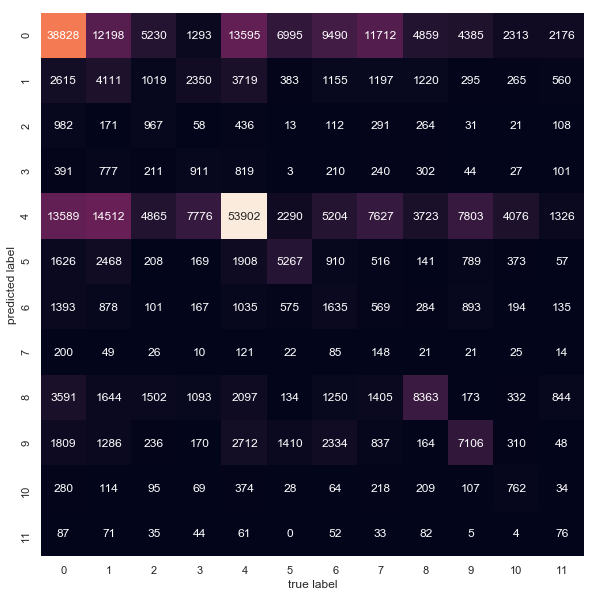

In [72]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Decision Tree Classifier - Entropy

In [73]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", min_samples_split=500)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [74]:
y_pred_en = clf_entropy.predict(X_test)
clf_ent_probs = clf_entropy.predict_proba(X_test)
score = log_loss(y_test, clf_ent_probs)
print(score)


2.0405135275832023


In [75]:
print("Accuracy is ", accuracy_score(y_test,y_pred_en)*100)

Accuracy is  36.75634436958787


Text(73.7,0.5,'predicted label')

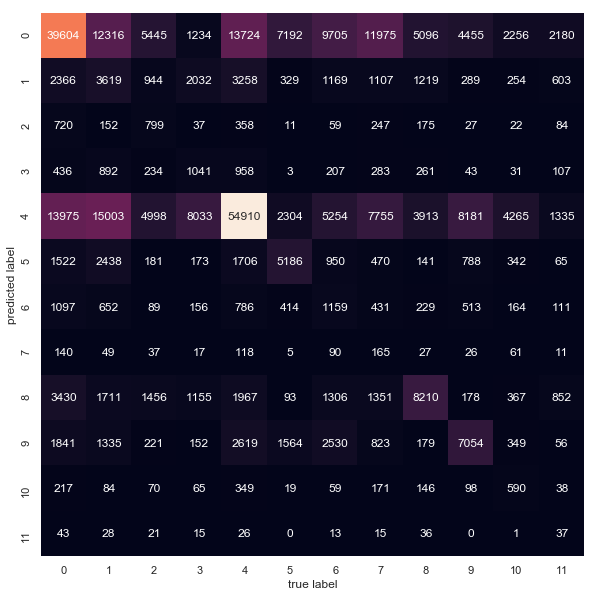

In [77]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

mat = confusion_matrix(y_test, y_pred_en)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [78]:
print(classification_report(y_test,y_pred_en))

              precision    recall  f1-score   support

           1       0.34      0.61      0.44     65391
           2       0.21      0.09      0.13     38279
           3       0.30      0.06      0.09     14495
           4       0.23      0.07      0.11     14110
           5       0.42      0.68      0.52     80779
           6       0.37      0.30      0.33     17120
           7       0.20      0.05      0.08     22501
           8       0.22      0.01      0.01     24793
           9       0.37      0.42      0.39     19632
          10       0.38      0.33      0.35     21652
          11       0.31      0.07      0.11      8702
          12       0.16      0.01      0.01      5479

   micro avg       0.37      0.37      0.37    332933
   macro avg       0.29      0.22      0.22    332933
weighted avg       0.32      0.37      0.31    332933



# Random Forest

C:\Users\renug\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy is  34.96889764607293
Log Loss: 3.2825414690223402
Classification report:               precision    recall  f1-score   support

           1       0.51      0.34      0.41     98452
           2       0.17      0.22      0.19     30338
           3       0.10      0.25      0.14      5913
           4       0.12      0.20      0.15      8521
           5       0.63      0.43      0.51    118434
           6       0.26      0.34      0.29     12740
           7       0.11      0.20      0.14     11973
           8       0.05      0.15      0.08      8808
           9       0.41      0.43      0.42     18722
          10       0.26      0.36      0.30     15447
          11       0.08      0.32      0.13      2254
          12       0.03      0.11      0.04      1331

   micro avg       0.35      0.35      0.35    332933
   macro avg       0.23      0.28      0.23    332933
weighted avg       0.45      0.35      0.38    332933



Text(73.7,0.5,'predicted label')

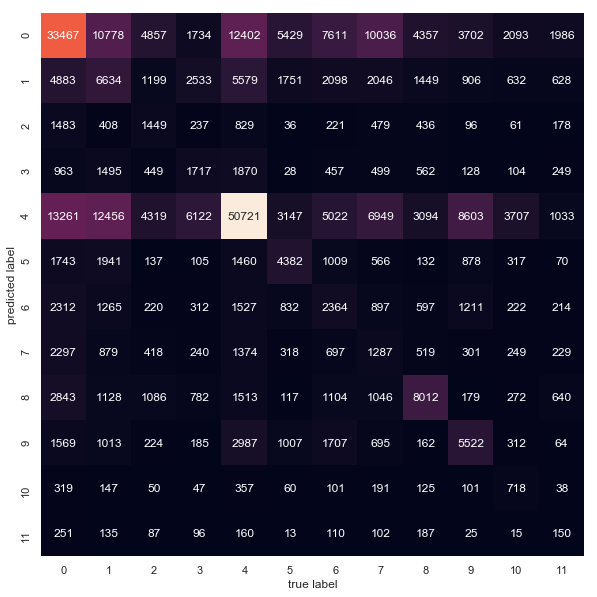

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model = RandomForestClassifier(n_estimators=50, random_state=0)
#visualize_classifier(model, X, y)

model.fit(X_train, y_train)
ypred = model.predict(X_test)
print("Accuracy is ", accuracy_score(y_test,ypred)*100)

rf_probs = model.predict_proba(X_test)
score = log_loss(y_test, rf_probs)
print("Log Loss:",score)

print("Classification report:",metrics.classification_report(ypred, y_test))
plt.figure(figsize=(10,10))
mat = metrics.confusion_matrix(y_test, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.xlabel('true label')
plt.ylabel('predicted label')

# KNN 

In [80]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_sm,y_sm)
knn_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,knn_pred)
print("Accuracy:",accuracy)

knn_probs = knn.predict_proba(X_test)
score = log_loss(y_test, knn_probs)
print("Log Loss:",score)

Accuracy: 0.34968897646072933
Log Loss: 7.538953446476407


In [81]:
knn.fit(X_train,y_train)
knn_probs = knn.predict_proba(X_test)
score = log_loss(y_test, knn_probs)
print("Log Loss:",score)

C:\Users\renug\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


Log Loss: 6.553609418686151


# Gaussian Naive Bayes

In [82]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, gnb_pred)
print("Accuracy:",accuracy)

gnb_probs = gnb.predict_proba(X_test)
score = log_loss(y_test, gnb_probs)
print("Log Loss:",score)

C:\Users\renug\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.27416026648004255
Log Loss: 2.1587977068861988


# Adaboost Classifier

In [83]:
from sklearn.ensemble import AdaBoostClassifier

adbc = AdaBoostClassifier(n_estimators=100,base_estimator=gnb,learning_rate=1)
adbc.fit(X_train, y_train)
adbc_pred = adbc.predict(X_test)
accuracy = accuracy_score(y_test, adbc_pred)
print("Accuracy:",accuracy)

adbc_probs = adbc.predict_proba(X_test)
score = log_loss(y_test, adbc_probs)
print("Log Loss:",score)


C:\Users\renug\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.09679424989412284
Log Loss: 2.500850625830872
